In [5]:
import requests
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [6]:
data = {}
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36'
                         ' (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'}

URL = ['https://www.amazon.in/Atomic-Habits-Proven-Build-Break-ebook/dp/B01N5AX61W/ref=pd_sim_351_7?_encoding=UTF8&pd'
       '_rd_i=B01N5AX61W&pd_rd_r=8d2e4820-e67c-486a-b361-70b9680b2cf1&pd_rd_w=hdiaX&pd_rd_wg=NnyGj&pf_rd_p=2d36b700-09'
       'c8-4bd0-9799-a8dbde5e27f5&pf_rd_r=STBCD827GYKMVG4G7Z1N&psc=1&refRID=STBCD827GYKMVG4G7Z1N',
        'https://www.amazon.in/Power-Your-Subconscious-Mind-ebook/dp/B07PJVJCQD/ref=sr_1_3?dchild=1&keywords=best'
        '+books&qid=1585289971&sr=8-3',
        'https://www.amazon.in/Percy-Jackson-Monsters-Rick-Riordan/dp/0141346841/ref=sr_1_1?dchild=1&keywords=best+'
        ''
        'books&qid=1585289971&sr=8-1',
       'https://www.amazon.in/Death-Inside-Story-those-shall/dp/0143450832/ref=sr_1_4?dchild=1&keywords=books&qid='
       '1585290073&refinements=p_n_binding_browse-bin%3A1318376031&rnid=1318374031&s=books&sr=1-4']


In [7]:
for url in URL:
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, 'html5lib')

    kindle_price1 = soup.find('span',  attrs={'class': 'a-size-base a-color-secondary'})
    kindle_price2 = soup.find('span',  attrs={'class': 'a-size-base a-color-price a-color-price'})
    kindle_price = (kindle_price2 or kindle_price1).text
    title1 = soup.find('span', attrs={'id': 'productTitle'})
    title2 = soup.find('span', attrs={'id': 'ebooksProductTitle'})
    title = (title1 or title2).text
    kindle_price = re.sub('[^\.\d]', '', kindle_price)
    title = re.sub('\n', '', title)
    title = title.strip()
    data[title] = float(kindle_price)

<BarContainer object of 4 artists>

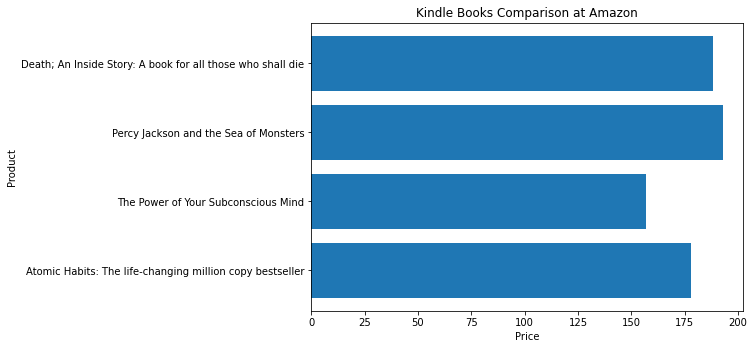

In [19]:
X = tuple(data.keys())
Y = tuple(data.values())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Kindle Books Comparison at Amazon')
plt.ylabel('Product')
plt.xlabel('Price')
plt.yticks(range(0,len(X)),X)
ax.barh(X, Y)


